In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
gamma = 0.9
reward_scale = 100.0
timesteps = np.linspace(0, 71, 72)
gammas = np.logspace(0, 71, 72, base=gamma)
resus_returns = np.zeros(72)
non_resus_returns = np.zeros(72)
for t in range(72):
    time_penalty = 0.0 if t == 0 else (-1 * gammas[:t]).sum()
    resus_returns[t] = time_penalty + reward_scale * gammas[t]
    non_resus_returns[t] = time_penalty - reward_scale * gammas[t]

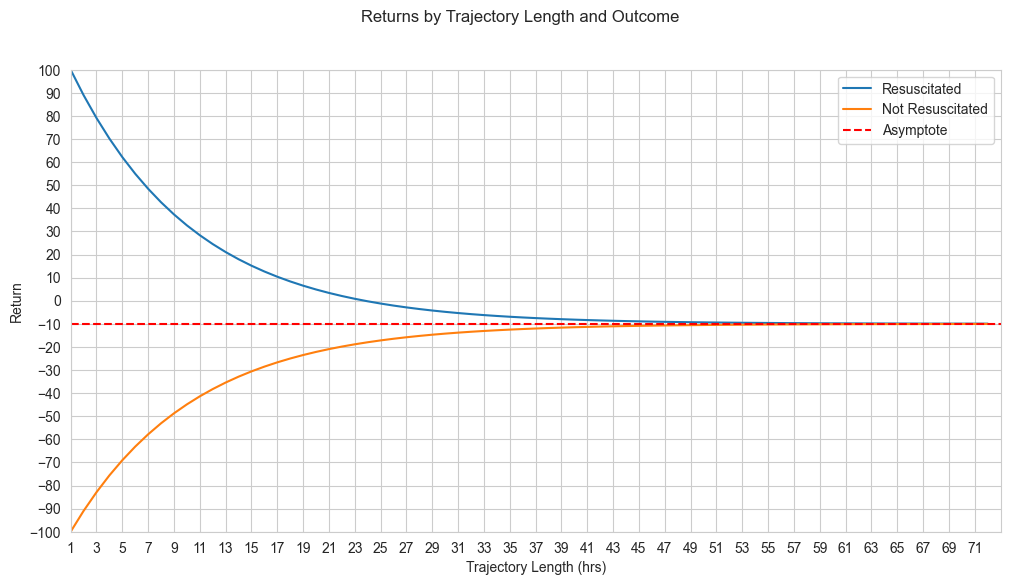

In [4]:
fig, ax = plt.subplots(figsize=(12, 6))
fig.suptitle('Returns by Trajectory Length and Outcome')
sns.lineplot(x=timesteps, y=resus_returns, ax=ax, label='Resuscitated')
sns.lineplot(x=timesteps, y=non_resus_returns, ax=ax, label='Not Resuscitated')
ax.set_xlabel('Trajectory Length (hrs)')
ax.set_ylabel('Return')
ax.axhline(-10, color='red', linestyle='--', label='Asymptote')
ax.set_xlim(0, 72)
ax.set_xticks(np.arange(0, 72, 2))
ax.set_xticklabels(np.arange(1, 73, 2))
ax.set_ylim(-100, 100)
ax.set_yticks(np.arange(-100, 101, 10))
# ax.grid(False)
ax.legend()
plt.show()

In [32]:
resus_returns[:10]

array([100.        ,  89.        ,  79.1       ,  70.19      ,
        62.171     ,  54.9539    ,  48.45851   ,  42.612659  ,
        37.3513931 ,  32.61625379])

In [33]:
non_resus_returns[:10]

array([-100.        ,  -91.        ,  -82.9       ,  -75.61      ,
        -69.049     ,  -63.1441    ,  -57.82969   ,  -53.046721  ,
        -48.7420489 ,  -44.86784401])